In [1]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/Visualizing_Geospatial_Data_in_Python/datasets/'

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# loading and preparing the datasets
neighborhoods_path = path_data + 'neighborhoods.geojson'
neighborhoods = gpd.read_file(neighborhoods_path)
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

In [3]:
# exercise 01

"""
Find the area of the Urban Residents neighborhood

How big is the Urban Residents neighborhood?
"""

# Instructions

"""

    Print the urban polygon and notice the units of each longitude/latitude pair.
    Create urban_poly_3857 by calling to_crs() on urban_polygon and print the head again. Notice the units of each longitude/latitude pair have changed.
    Print the area of urban_poly_3857. Remember to divide by 10**6 to get kilometers squared.

"""

# solution

# Print the head of the urban polygon 
print(urban_polygon.head())

# Create a copy of the urban_polygon using EPSG:3857 and print the head
urban_poly_3857 = urban_polygon.to_crs(epsg = 3857)
print(urban_poly_3857.head())

# Print the area of urban_poly_3857 in kilometers squared
area = urban_poly_3857.area / 10**6
print('The area of the Urban Residents neighborhood is ', area.iloc[0], ' km squared')

#----------------------------------#

# Conclusion

"""
The Urban Residents neighborhood is around 1.13 square km. That seems manageable for walking to see the public art!
"""

               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ...
               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-9660441.281 4323289.005, -966...
The area of the Urban Residents neighborhood is  1.128989605798646  km squared


'\nThe Urban Residents neighborhood is around 1.13 square km. That seems manageable for walking to see the public art!\n'

<class 'geopandas.geoseries.GeoSeries'>


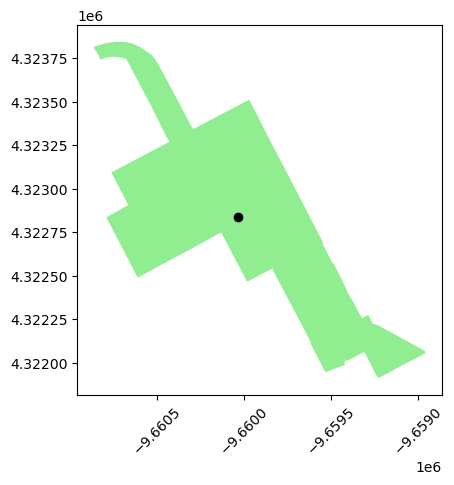

'\nYou can see the centroid of the Urban Residents neighborhood. Notice that latitude and longitude are in meters instead of degrees. In the next exercise you will calculate the distance in meters of each artwork from the centroid of the Urban Residents neighborhood.\n'

In [4]:
# exercise 02

"""
The center of the Urban Residents neighborhood

Now you'll find the center point of the urban_poly_3857 and plot it over the polygon.
"""

# Instructions

"""

    Create downtown_center, from urban_poly_3857 using the GeoSeries centroid attribute.
    Print the datatype of downtown_center.
    Plot urban_poly_3857 as ax using lightgreen for the color.
    Plot the downtown_center, setting ax = ax and color = black. The x-axis ticks are rotated for you. We've included the code to show the plot.

"""

# solution

# Create downtown_center from urban_poly_3857
downtown_center = urban_poly_3857.geometry.centroid

# Print the type of downtown_center 
print(type(downtown_center))

# Plot the urban_poly_3857 as ax and add the center point
ax = urban_poly_3857.plot(color = 'lightgreen')
downtown_center.plot(ax = ax, color = 'black')
plt.xticks(rotation = 45)

# Show the plot
plt.show()

#----------------------------------#

# Conclusion

"""
You can see the centroid of the Urban Residents neighborhood. Notice that latitude and longitude are in meters instead of degrees. In the next exercise you will calculate the distance in meters of each artwork from the centroid of the Urban Residents neighborhood.
"""

In [5]:
center_point = downtown_center

In [6]:
# load art data
from shapely.geometry import Point
data_path = path_data + 'art_clean.csv'
art = gpd.read_file(data_path)
art['geometry']=art.apply(lambda x: Point((x.lng, x.lat)), axis=1)
art.head(1)

,field_1,title,last_name,first_name,address,medium,type,desc,lat,lng,loc,geometry
0,0,[Cross Country Runners],Frost,Miley,"4001 Harding Rd., Nashville TN",Bronze,Sculpture,,36.12856,-86.8366,"(36.12856, -86.8366)",POINT (-86.83660 36.12856)


In [7]:
## exercise 03

"""
Prepare to calculate distances

In this exercise you will prepare a GeoDataFrame called art_dist_meters with the locations of downtown art converted to meters using EPSG:3857. You will use art_dist_meters in the next exercise to calculate the distance of each artwork from the center of the Urban Residents neighborhood in meters.

The art data has been pre-loaded for you, along with urban_poly_3857 and center_point, the center point of the Urban Residents neighborhood. A geometry column called geometry that uses degrees has already been created in the art DataFrame.
"""

# Instructions

"""

    Create a GeoDataFrame called art_dist_meters, using the art DataFrame and the geometry column from art. Set crs = {'init': 'epsg:4326'} since the geometry is in decimal degrees. Print the first two rows.
    Now explicitly set the coordinate reference system to EPSG:3857 for art_dist_meters by using to_crs(). Print the first two rows again.
    Add a column called center to art_dist_meters, setting it equal to center_point for every row .

"""

# solution

# Import packages
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd

# Create art_dist_meters using art and the geometry from art
art_dist_meters = gpd.GeoDataFrame(art, geometry = art.geometry, crs = {'init': 'epsg:4326'})
print(art_dist_meters.head(2))

# Set the crs of art_dist_meters to use EPSG:3857
art_dist_meters.geometry = art_dist_meters.geometry.to_crs(epsg = 3857)
print(art_dist_meters.head(2))

# Add a column to art_meters, center
art_dist_meters['center'] = center_point

#----------------------------------#

# Conclusion

"""
Well done! The art_dist_meters Data Frame has the location of each artwork and the center point of the Urban Residents neighborhood -- both using meters for distance.
"""

/home/nero/.local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


  field_1                            title last_name first_name   
0       0          [Cross Country Runners]     Frost      Miley  \
1       1  [Fourth and Commerce Sculpture]    Walker        Lin   

                             address  medium       type desc       lat   
0     4001 Harding Rd., Nashville TN  Bronze  Sculpture       36.12856  \
1  333 Commerce Street, Nashville TN          Sculpture       36.16234   

         lng                    loc                    geometry  
0   -86.8366   (36.12856, -86.8366)  POINT (-86.83660 36.12856)  
1  -86.77774  (36.16234, -86.77774)  POINT (-86.77774 36.16234)  
  field_1                            title last_name first_name   
0       0          [Cross Country Runners]     Frost      Miley  \
1       1  [Fourth and Commerce Sculpture]    Walker        Lin   

                             address  medium       type desc       lat   
0     4001 Harding Rd., Nashville TN  Bronze  Sculpture       36.12856  \
1  333 Commerce Street, Nas

'\nWell done! The art_dist_meters Data Frame has the location of each artwork and the center point of the Urban Residents neighborhood -- both using meters for distance.\n'

In [8]:
data_path = path_data + 'art_dist_meters.csv'
art_dist_meters = gpd.read_file(data_path)
art_dist_meters['geometry']=art_dist_meters.apply(lambda x: Point((x.lng, x.lat)), axis=1)
art_dist_meters.crs = "EPSG:4326" 
art_dist_meters = art_dist_meters.to_crs("EPSG:3857")

In [9]:
from shapely import wkt
art_dist_meters['center'] = gpd.GeoSeries.from_wkt(art_dist_meters['center'])

In [10]:
art_dist_meters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   field_1     132 non-null    object  
 1   title       132 non-null    object  
 2   last_name   132 non-null    object  
 3   first_name  132 non-null    object  
 4   address     132 non-null    object  
 5   medium      132 non-null    object  
 6   type        132 non-null    object  
 7   desc        132 non-null    object  
 8   lat         132 non-null    object  
 9   lng         132 non-null    object  
 10  loc         132 non-null    object  
 11  center      132 non-null    geometry
 12  geometry    132 non-null    geometry
dtypes: geometry(2), object(11)
memory usage: 13.5+ KB


In [11]:
# exercise 04

"""
Art distances from neighborhood center

Now that you have the center point and the art locations in the units we need to calculate distances in meters, it's time to perform that step.
"""

# Instructions

"""
Art distances from neighborhood center

Now that you have the center point and the art locations in the units we need to calculate distances in meters, it's time to perform that step.
"""

# solution

# Import package for pretty printing
import pprint

# Build a dictionary of titles and distances for Urban Residents art
art_distances = {}
for row in art_dist_meters.iterrows():
    vals = row[1]
    key = vals['title']
    ctr = vals['center']
    art_distances[key] = vals['geometry'].distance(ctr)
    

# Pretty print the art_distances
pprint.pprint(art_distances)

#----------------------------------#

# Conclusion

"""
Great work! You can see each art title and its distance in meters from the center of the Urban Residents neighborhood.
"""

{'12th & Porter Mural': 1269.1502879147693,
 'A Splash of Color': 2471.7747384598574,
 'A Story of Nashville': 513.5632030515217,
 'Aerial Innovations Mural': 4516.75521040671,
 'Airport Sun Project': 12797.594229778902,
 'Andrew Jackson': 948.9812821693182,
 'Angel': 10202.565989739925,
 'Anticipation': 688.8349105339693,
 'April Baby': 4779.394424951864,
 'Arial Triangle [from the Gravity Series]': 4315.322141147826,
 'Ariel': 4380.927773958118,
 'Athena Parthenos': 4294.778095691777,
 'Benedictio': 5313.624214289168,
 'Bicycle Bus-Green Fleet': 468.0828635525261,
 'Blowing Bubbles': 10202.565989739925,
 'Breaking Bread': 1279.2562933076417,
 'Building a Positive Community': 2253.4179974156327,
 'Can-Do': 5648.0863220795745,
 'Chet Atkins': 604.448944815362,
 "Children's Chairs For The Seasons": 513.5632030515217,
 'Confederate Memorial': 5313.624214289168,
 'Confederate Private Monument': 4316.459103421594,
 'Confluence': 2918.524412105263,
 'Cool Fences': 6491.846030115438,
 'Danci

'\nGreat work! You can see each art title and its distance in meters from the center of the Urban Residents neighborhood.\n'

In [12]:
urban_polygon.loc[urban_polygon['name'] == 'center', 'geometry'] = Point((-86.77756, 36.16128))

In [13]:
# exercise 05

"""
Create a folium location from the urban centroid

In order to construct a folium map of the Urban Residents neighborhood, you need to build a coordinate pair location that is formatted for folium.
"""

# Instructions

"""

    Print the head of urban_polygon.
    Store the first occurrence of center as urban_center and print urban_center. This has been done for you.
    Create an array from urban_center that reverses the order of longitude and latitude. Call this urban_location.
    Print urban_location. This has been done for you.

"""

# solution

# Print the head of the urban_polygon
print(urban_polygon.head())

# Create urban_center from the urban_polygon center
urban_center = urban_polygon.centroid.iloc[0]

# Print urban_center
print(urban_center)

# Create array for folium called urban_location
urban_location = [urban_center.y, urban_center.x]

# Print urban_location
print(urban_location)

#----------------------------------#

# Conclusion

"""
Folium locations are arrays with latitude first. You just created a folium location from the center of the Urban Residents neighborhood
"""

               name                                           geometry
41  Urban Residents  MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ...
POINT (-86.77756457127047 36.161278209287914)
[36.161278209287914, -86.77756457127047]


/tmp/ipykernel_676352/1847229206.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  urban_center = urban_polygon.centroid.iloc[0]


'\nFolium locations are arrays with latitude first. You just created a folium location from the center of the Urban Residents neighborhood\n'

In [14]:
# import module
import folium

In [15]:
# exercise 06

"""
Create a folium map of downtown Nashville

In this exercise you will create a street map of downtown Nashville using folium.
"""

# Instructions

"""

    Construct a folium map called downtown_map. Use the urban_location array you created in the previous exercise and set the initial zoom level to 15.
    Display your folium map object with the provided display function.

"""

# solution

# Construct a folium map with urban_location
downtown_map = folium.Map(location = urban_location, zoom_start = 15)

# Display the map
display(downtown_map)

#----------------------------------#

# Conclusion

"""
You've created a map of Nashville's downtown area with Folium. Next we'll add to that map.
"""

"\nYou've created a map of Nashville's downtown area with Folium. Next we'll add to that map.\n"

In [16]:
urban_polygon.crs = "EPSG:4326"
urban_polygon.to_crs(epsg = 4326)

,name,geometry
41,Urban Residents,"MULTIPOLYGON (((-86.78122 36.16457, -86.78205 ..."


In [17]:
# exercise 07

"""
Folium street map of the downtown neighborhood

This time you will create the folium map of downtown and add the Urban Residents neighborhood area from urban_polygon. The urban_polygon has been printed to your console.
"""

# Instructions

"""

    Create an array called folium_loc from urban_polygon.center
    Create a folium map called downtown_map. Set the location argument equal to folium_loc and initialize the map with a zoom_start of 15.
    Pass the geometry from the urban_polygon GeoDataFrame to the folium.GeoJson() method. Then call add_to() on that.

"""

# solution

# Create array for called folium_loc from the urban_polygon center point
point = urban_polygon.centroid.iloc[0]
folium_loc = [point.y, point.x]

# Construct a map from folium_loc: downtown_map
downtown_map = folium.Map(location = folium_loc, zoom_start = 15)

# Draw our neighborhood: Urban Residents
folium.GeoJson(urban_polygon.geometry).add_to(downtown_map)

# Display the map
display(downtown_map)

#----------------------------------#

# Conclusion

"""
Excellent! You put everything together to create a folium map with the Urban Residents neighborhood polygon drawn on top of it.
"""

/tmp/ipykernel_676352/1945823790.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = urban_polygon.centroid.iloc[0]


'\nExcellent! You put everything together to create a folium map with the Urban Residents neighborhood polygon drawn on top of it.\n'

In [18]:
# creating urban_art data
urban_polygon = urban_polygon.to_crs(epsg=3857)
urban_art = gpd.sjoin(urban_polygon, art_dist_meters, predicate = 'contains')

In [19]:
# exercise 08

"""
Adding markers for the public art

Now that you have added the polygon for the Urban Residents neighborhood to your folium street map, it's time to add the locations of the art within the neighborhood. You can do that by creating folium markers. Each marker needs a location assigned. Use iterrows() to loop through the data to grab the values you need.
"""

# Instructions

"""

    First take a look at the tuple returned by iterrows() by printing the first and second values.
    Assign the second value of the iterrows() tuple to row_values. Create a location formatted for folium, use it to build a marker, and add it to the downtown_map.
    Display the map.

"""

# solution

# Iterate through the urban_art and print each part of tuple returned
for row in urban_art.iterrows():
  print('first part: ', row[0])
  print('second part: ', row[1])

# Create a location and marker with each iteration for the downtown_map
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['lat'], row_values['lng']]
    marker = folium.Marker(location = location)
    marker.add_to(downtown_map)

# Display the map
display(downtown_map)

#----------------------------------#

# Conclusion

"""
Nicely done! You have created a folium map of downtown Nashville, a polygon showing the Urban Residents neighborhood, and markers to show the location of the artworks. All that's left is to create some popups for the markers!
"""

first part:  41
second part:  name                                             Urban Residents
geometry       MULTIPOLYGON (((-9660441.28068029 4323289.0047...
index_right                                                   54
field_1                                                       54
title                                          Johnny Cash Mural
last_name                 Bryan Deese, Audie Adams, Ryan Shrader
first_name                                                      
address                                           300 4th Avenue
medium                               Latex paint and spray paint
type                                                       Mural
desc           Classic street art by Thoughts Manifested crew...
lat                                                    36.158301
lng                                                   -86.774955
loc                                      (36.158301, -86.774955)
center              POINT (-9660034.312198788 4322835.782813

"\nNicely done! You have created a folium map of downtown Nashville, a polygon showing the Urban Residents neighborhood, and markers to show the location of the artworks. All that's left is to create some popups for the markers!\n"

In [20]:
# exercise 09

"""
Troubleshooting data issues

You will be building popups for the downtown art using the title and desc columns from the urban_art DataFrame. Here, you will inspect those columns to identify and clean up any problematic values.
"""

# Instructions

"""

    Print and inspect the values in the title column of the urban_art DataFrame.
    Print and inspect the values in the desc column of the urban_art DataFrame.
    Use the fillna() method to replace the NaN values in the desc column with empty strings, and use .str.replace to replace the apostrophes (') with back-ticks (`).
    Print the descriptions again to verify your work.

"""

# solution

# Print the urban_art titles
print(urban_art.title)

#Print the urban_art descriptions
print(urban_art.desc)

# Replace Nan and ' values in description
urban_art.desc.fillna('', inplace = True)
urban_art.desc = urban_art.desc.str.replace("'", "`")

#Print the urban_art descriptions again
print(urban_art.desc)

#----------------------------------#

# Conclusion

"""
Yes! Now that the data cleanup is done, it's time to build your marker popups!
"""

41                                    Johnny Cash Mural
41                                  The Recording Angel
41                                          The Flutist
41                                  The Birth of Apollo
41                                 Orpheus and Eurydice
41                                              Oh, Roy
41                                   Thomas Gleen Ryman
41                                 A Story of Nashville
41                                        Library Doors
41                                      Foliated Scroll
41                                La Storia della Terra
41                    Children's Chairs For The Seasons
41    Nashville, A History through Maps and Aerial V...
41                                           The Prince
41                                             Timeless
41                              Lightning Wire Fountain
41                      [Fourth and Commerce Sculpture]
41                                Les Paul Guita

"\nYes! Now that the data cleanup is done, it's time to build your marker popups!\n"

In [21]:
nashville = [36.16127820928791, -86.77756457127047]

In [22]:
#urban_polygon.drop(columns = ['center'], inplace = True)
urban_polygon

,name,geometry
41,Urban Residents,"MULTIPOLYGON (((-9660441.281 4323289.005, -966..."


In [23]:
# exercise 10

"""
A map of downtown art

Now you will assign a popup to each marker to give information about the artwork at each location. In particular you will assign the art title to the popup for each marker. You will do so by creating the map object downtown_map, then add the popups, and finally use the display function to show your map.

One warning before you start: you'll need to ensure that all instances of single quotes (') are removed from the pop-up message, otherwise your plot may not render!
"""

# Instructions

"""

    For each row in urban_art, build a popup message that includes the title for the corresponding artwork.
    Complete the code to replace all instances of single quotes (') with backticks (`) in the popup messages.
    Display the finished map.

"""

# solution

# Construct downtown map
downtown_map = folium.Map(location = nashville, zoom_start = 15)
folium.GeoJson(urban_polygon).add_to(downtown_map)

# Create popups inside the loop you built to create the markers
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['lat'], row_values['lng']]
    popup = (str(row_values['title'])).replace("'", "`")
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(downtown_map)

# Display the map.
display(downtown_map)

#----------------------------------#

# Conclusion

"""
Well done! Your map of public art in the Downtown Residents neighborhood is complete with a street map, markers to show the art is located, and popups that give more information about each artwork.
"""

'\nWell done! Your map of public art in the Downtown Residents neighborhood is complete with a street map, markers to show the art is located, and popups that give more information about each artwork.\n'